<a href="https://colab.research.google.com/github/RichardKameri/Machine-learning-2/blob/main/Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

In [4]:
df=pd.read_excel('/content/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
#percentage of null values in the columns
df.isnull().sum()/len(df)*100

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.268311
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,24.926694
Country,0.000000


In [8]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [9]:
df = pd.get_dummies(df, columns=['Country'], drop_first=True,dtype=int)

In [10]:
df['InvoiceNo_Freq']=df['InvoiceNo'].map(df['InvoiceNo'].value_counts())
df= df.drop(columns=['InvoiceNo'])

In [11]:
df['StockCode_Freq'] = df['StockCode'].map(df['StockCode'].value_counts())
df= df.drop(columns=['StockCode'])


In [12]:
scaler = StandardScaler()
df['Quantity'] = scaler.fit_transform(df[['Quantity']])

In [13]:
df['UnitPrice'] = scaler.fit_transform(df[['UnitPrice']])

In [14]:
df['Quantity'] = scaler.fit_transform(df[['Quantity']])

In [15]:
df['InvoiceYear'] = pd.to_datetime(df['InvoiceDate']).dt.year
df['InvoiceMonth'] = pd.to_datetime(df['InvoiceDate']).dt.month
df['InvoiceDayOfWeek'] = pd.to_datetime(df['InvoiceDate']).dt.dayofweek
df['InvoiceHour'] = pd.to_datetime(df['InvoiceDate']).dt.hour


In [16]:
df=df.drop(columns=['InvoiceDate'])

In [17]:
df.drop(columns=['InvoiceYear'], inplace=True)

In [18]:
df.drop(columns=['Description'],inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 44 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Quantity                      541909 non-null  float64
 1   UnitPrice                     541909 non-null  float64
 2   Country_Austria               541909 non-null  int64  
 3   Country_Bahrain               541909 non-null  int64  
 4   Country_Belgium               541909 non-null  int64  
 5   Country_Brazil                541909 non-null  int64  
 6   Country_Canada                541909 non-null  int64  
 7   Country_Channel Islands       541909 non-null  int64  
 8   Country_Cyprus                541909 non-null  int64  
 9   Country_Czech Republic        541909 non-null  int64  
 10  Country_Denmark               541909 non-null  int64  
 11  Country_EIRE                  541909 non-null  int64  
 12  Country_European Community    541909 non-nul

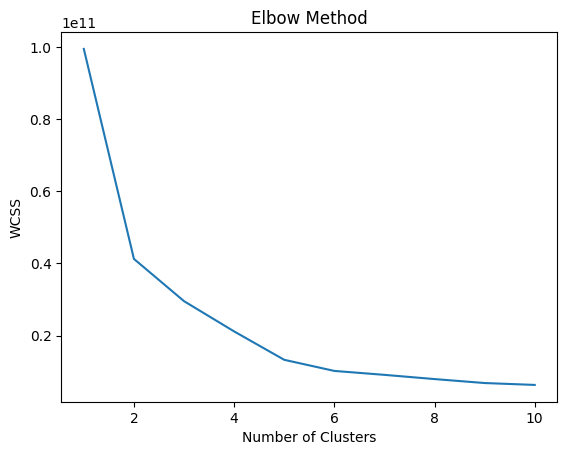

         Quantity  UnitPrice  Country_Austria  Country_Bahrain  \
Cluster                                                          
0       -0.004083  -0.006597         0.000737         0.000038   
1        0.008429   0.021381         0.000803         0.000024   
2        0.029423  -0.005539         0.000377         0.000054   

         Country_Belgium  Country_Brazil  Country_Canada  \
Cluster                                                    
0               0.003329        0.000050        0.000310   
1               0.005399        0.000087        0.000189   
2               0.003445        0.000054        0.000215   

         Country_Channel Islands  Country_Cyprus  Country_Czech Republic  ...  \
Cluster                                                                   ...   
0                       0.001269        0.001305                0.000061  ...   
1                       0.001700        0.000630                0.000047  ...   
2                       0.002099        0.00

In [23]:
# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Fit KMeans with the chosen number of clusters (e.g., 3)
# Assuming 3 clusters based on elbow method, you might need to adjust
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(df) #This line assigns cluster labels

#aggregate analysis
df['Cluster'] = cluster_labels
print(df.groupby('Cluster').mean()) #Removed desc=TRUE, it's not a valid argument

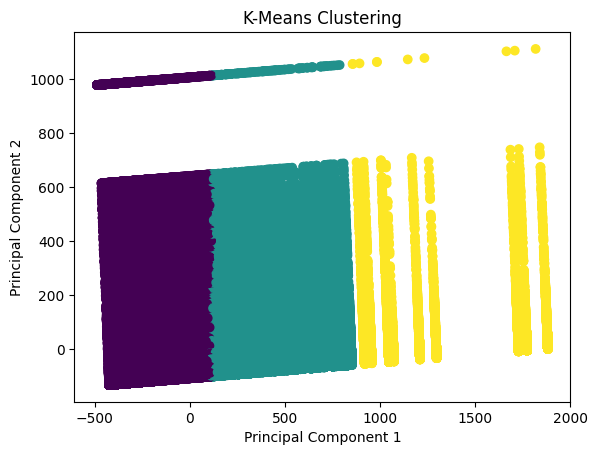

In [24]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.show()